<a href="https://colab.research.google.com/github/hp241t/Automobile_Data_Analysis/blob/master/Linear_Regression_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression for House prices: 

In [10]:
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1.txt


In [0]:
import pandas as pd
import numpy as np


In [29]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['ex1data1.txt']))
df2.columns = ['City Polpulation', 'Prices']
print(df2.head())

   City Polpulation   Prices
0            5.5277   9.1302
1            8.5186  13.6620
2            7.0032  11.8540
3            5.8598   6.8233
4            8.3829  11.8860


In [25]:
df2.describe()

,City Polpulation,Prices
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
City Polpulation    96 non-null float64
Prices              96 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


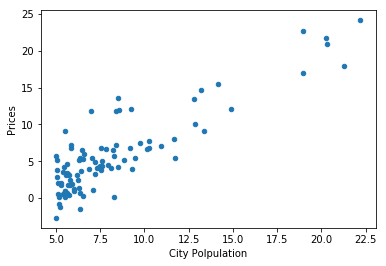

In [33]:
from matplotlib import pyplot as plt

df2.plot (x='City Polpulation', y ='Prices', kind ='scatter')
plt.show()

In [38]:
df2.columns[:]


Index(['City Polpulation', 'Prices'], dtype='object')

In [40]:
data = df2.as_matrix(columns=df2.columns[:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
X, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)

ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X],1)
print(X)

m = y.size

[[ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7.4239]
 [ 1.      7

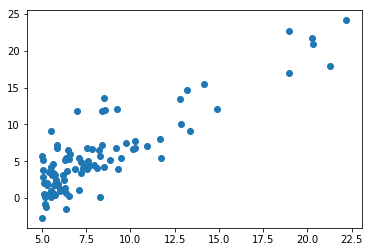

In [47]:
plt.scatter(data[:, 0].reshape(-1,1), y)

# Model building

### Set the hyper parameter

In [0]:
alpha = 0.001
iters = 100000

theta = np.array([[1.0,1.0]])

### Create the cost function

In [0]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

In [63]:
computeCost(X, y, theta) 

9.801222644366666

## Gradient descent

In [0]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)

In [65]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

[[-4.21150393  1.21354725]] 3.4595819031580053


### Plot

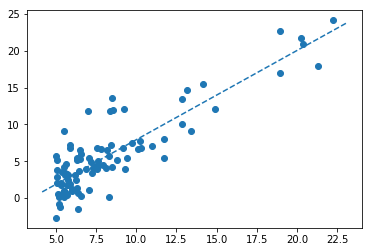

In [66]:
plt.scatter(data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')